<a href="https://colab.research.google.com/github/Nitin-31121999/Data-Analysis-Practice/blob/main/Zomato_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import missingno as ms

In [3]:
df=pd.read_csv("/content/Zomato data_1.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [4]:
df.sample(50)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
47,Recipe,Yes,No,4.0/5,804,450,Dining
50,Petoo,No,No,3.7/5,21,450,Dining
98,Chatar Patar,No,No,3.7/5,65,300,Dining
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
31,Foodiction,Yes,No,2.8/5,506,500,other
122,Coffee Bytes,No,No,3.1/5,6,100,Dining
21,Woodee Pizza,Yes,No,3.7/5,180,500,Cafes
56,Banashankari Donne Biriyani,Yes,No,3.8/5,104,300,Dining
99,Polar Bear,Yes,No,3.8/5,71,400,Dining
116,Wood Stove,No,No,3.4/5,0,150,Dining


In [5]:
df.shape

(148, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [8]:
df.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [10]:
df["name"].value_counts(ascending=False)

,count
name,
San Churro Cafe,2
CAFE NOVA,2
Onesta,2
Jalsa,1
Kotian Karavali Restaurant,1
...,...
Kitchen Garden,1
Hotboxit,1
Domino's Pizza,1


In [17]:
df["rate"]=df["rate"].str.split("/").str.get(0)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


<Axes: xlabel='listed_in(type)', ylabel='count'>

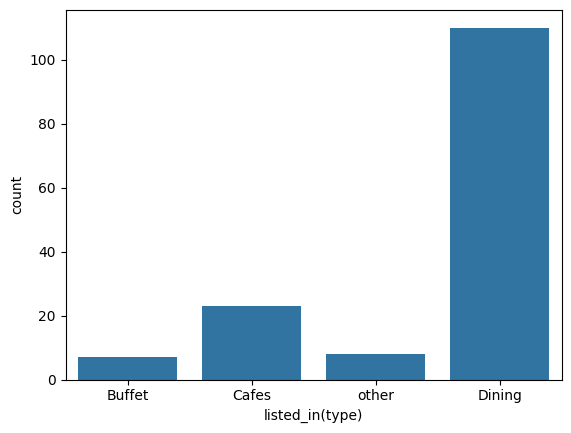

In [18]:
sns.countplot(data=df,x="listed_in(type)")

In [25]:
temp_df=df.groupby("listed_in(type)").sum(numeric_only=True)
temp_df

,votes,approx_cost(for two people)
listed_in(type),,
Buffet,3028,4700
Cafes,6434,12550
Dining,20363,39300
other,9367,5350


<Axes: xlabel='listed_in(type)', ylabel='votes'>

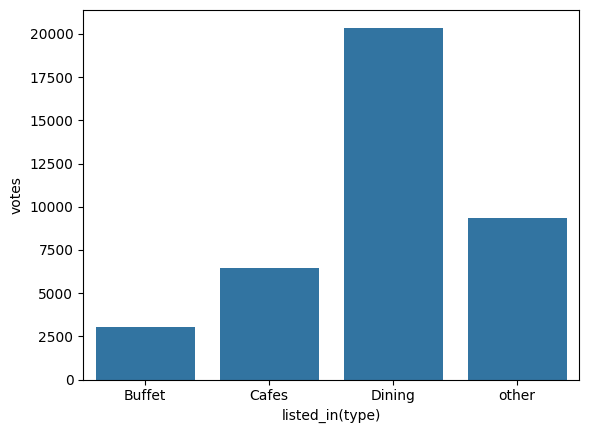

In [27]:
sns.barplot(data=temp_df,x="listed_in(type)",y="votes")

In [29]:
df["rate"].value_counts().index[0]

'3.8'

In [30]:
df.sample(20)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
18,T3H Cafe,No,No,3.9,93,300,Cafes
66,Namma Brahmin's Idli,Yes,No,3.6,34,100,Dining
55,FreshMenu,Yes,No,3.9,627,450,Dining
102,Kotian Karavali Restaurant,No,No,3.5,10,300,Dining
75,Om Sri Vinayaka Chats,No,No,3.6,0,500,Dining
52,Corner House Ice Cream,No,No,4.3,345,400,Dining
85,The Big O Bakes,No,No,4.0,66,300,Dining
24,Hide Out Cafe,No,No,3.7,31,300,Cafes
129,Sri Basaveshwar Jolada Rotti Oota,No,No,3.4,0,150,Dining
43,Domino's Pizza,Yes,No,3.9,540,800,Dining


<Axes: xlabel='online_order', ylabel='rate'>

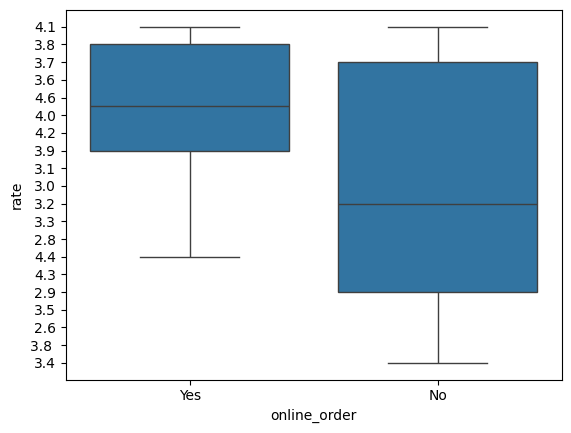

In [40]:
sns.boxplot(data=df,x="online_order",y="rate")